In [1]:
#Topics:
#RNN
#LSTM RNN
#GRU RNN
#Bidirectional LSTM RNN
#Encoders-Decoders
#Transformers
#BERT-SBERT

## RNN

In [2]:
# Let’s load the libraries

import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [3]:
# Let’s read train and test datasets.
train  = pd.read_csv('train_E6oV3lV.csv') 
print('Shape of train', train.shape)
test = pd.read_csv('test_tweets_anuFYb8.csv')
print('Shape of test', test.shape)

Shape of train (31962, 3)
Shape of test (17197, 2)


In [4]:
#Train and Test Merge
combi = train.append(test, ignore_index=True, sort=True)
combi = combi.dropna()
print(combi.shape)
combi.sample(5)

(31962, 3)


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_13944\3383634454.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True, sort=True)


,id,label,tweet
29584,29585,0.0,#animalface gorilla simulator: you need to do to adapt to the environment. the need to tear the city. mate
2766,2767,0.0,#childhood bull up: you will dominate your bull and you will direct it whatever you want it to do. when yo
9270,9271,0.0,looking cool in river island outfit @user @user #riverisland #cute #smile
9428,9429,0.0,@user @user whole speech was attempt for appreciating what he's doing vs isis (not enough) and attacking @user ðð¼ðð¼
1553,1554,1.0,@user feds provide inadequate #mentalhealth care for #firstnations: internal memo #thirdworldcanada


In [5]:
#https://www.kaggle.com/code/kcsener/8-recurrent-neural-network-rnn-tutorial
##https://www.youtube.com/watch?v=ZwYtqTaZ2io&list=PLZoTAELRMXVNNrHSKv36Lr3_156yCo6Nn&index=8
#https://www.kaggle.com/code/prashant111/comprehensive-guide-to-rnn-with-keras

## Recurrent Neural Network (RNN)

### RNN is able to remember important things about the input received, which enables them to be very precise in predicting what's coming next.

### This is the reason why they are preferred algorithm for sequential data like time series, speech, text, financial data, audio, video because they can perform a much deeper understanding of a sequence and its content compared to the other algorithms.

### Not only feeds output but also gives feed backs into itself. Because RNN has internal memory. How? RNN has hidden layers which have temporal loop (kendini besleyen zamansal döngüye sahiptir ve geçici belleğe sahiptir).

In [6]:
# function to preprocess speech
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
    return text

In [7]:
combi['text'] = combi['tweet'].apply(clean)
combi.head(2)

,id,label,tweet,text
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked


In [8]:
def remove_url(sentence):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', sentence)


def remove_at(sentence):
    url = re.compile(r'@\S+')
    return url.sub(r'', sentence)

def remove_html(sentence):
    html = re.compile(r'<.*?>')
    return html.sub(r'', sentence)

def remove_emoji(sentence):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', sentence)

def remove_stopwords(sentence):
    words = sentence.split()
    words = [word for word in words if word not in stopwords.words('english')]
    
    return ' '.join(words)

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def stem_words(sentence):
    words = sentence.split()
    words = [stemmer.stem(word) for word in words ]
    
    return ' '.join(words)

def clean_text(data):
    data['text'] = data['text'].apply(lambda x : remove_url(x))
    data['text'] = data['text'].apply(lambda x : remove_at(x))
    data['text'] = data['text'].apply(lambda x : remove_html(x))
    data['text'] = data['text'].apply(lambda x : remove_emoji(x))
    data['text'] = data['text'].apply(lambda x : remove_stopwords(x))
    data['text'] = data['text'].apply(lambda x : stem_words(x))
    
    return data

In [9]:
combi = clean_text(combi)
combi.head(2)

,id,label,tweet,text
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunct selfish drag kid dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit can't use caus offer wheelchair van pdx. #disapoint #getthank


In [10]:
#Encode sentences
def define_tokenizer(train_sentences, val_sentences, test_sentences):
    sentences = pd.concat([train_sentences, val_sentences, test_sentences])
    
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(sentences)
    
    return tokenizer
    
def encode(sentences, tokenizer):
    encoded_sentences = tokenizer.texts_to_sequences(sentences)
    encoded_sentences = tf.keras.preprocessing.sequence.pad_sequences(encoded_sentences, padding='post')
    
    return encoded_sentences

In [11]:
combi.shape

(31962, 4)

In [12]:
# splitting data into training and validation set 
val_data = combi.head(25000).tail(5000)
train_data = combi.head(20000)
test_data = combi.tail(6962)

In [13]:
tokenizer = define_tokenizer(train_data['text'], val_data['text'], test_data['text'])

encoded_sentences = encode(train_data['text'], tokenizer)
val_encoded_sentences = encode(val_data['text'], tokenizer)
encoded_test_sentences = encode(test_data['text'], tokenizer)

In [14]:
tokenizer.word_index['disaster']

6815

In [15]:
#The word index can also be used to find out how many words are in the vocabulary.
len(tokenizer.word_index)

42333

In [16]:
print('Lower: ', tokenizer.get_config()['lower'])
print('Split: ', tokenizer.get_config()['split'])
print('Filters: ', tokenizer.get_config()['filters'])

Lower:  True
Split:   
Filters:  !"#$%&()*+,-./:;<=>?@[\]^_`{|}~	



In [17]:
embedding_dict = {}

with open('C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/glove.6B.100d.txt','r',encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:],'float32')
        embedding_dict[word] = vectors
        
f.close()

In [18]:
#To ensure the encoding of the tokenizer and the embeddings are synchronized I use the below function to update the encoded words in the embedding with the encoding from the tokenizer.

num_words = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

for word, i in tokenizer.word_index.items():
    if i > num_words:
        continue
    
    emb_vec = embedding_dict.get(word)
    
    if emb_vec is not None:
        embedding_matrix[i] = emb_vec

In [19]:
#Define pipeline
train_data['target'] = train_data['label'].apply(np.int64)
val_data['target'] = val_data['label'].apply(np.int64)
test_data['target'] = test_data['label'].apply(np.int64)
tf_data = tf.data.Dataset.from_tensor_slices((encoded_sentences, train_data['target'].values))

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_13944\2567929554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['target'] = train_data['label'].apply(np.int64)
C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_13944\2567929554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['target'] = test_data['label'].apply(np.int64)


In [20]:
def pipeline(tf_data, buffer_size=100, batch_size=32):
    tf_data = tf_data.shuffle(buffer_size)    
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    tf_data = tf_data.padded_batch(batch_size, padded_shapes=([None],[]))
    
    return tf_data

tf_data = pipeline(tf_data, buffer_size=1000, batch_size=32)

In [21]:
print(tf_data)

<PaddedBatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [22]:
tf_val_data = tf.data.Dataset.from_tensor_slices((val_encoded_sentences, val_data['target'].values))

In [23]:
def val_pipeline(tf_data, batch_size=1):        
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    tf_data = tf_data.padded_batch(batch_size, padded_shapes=([None],[]))
    
    return tf_data

tf_val_data = val_pipeline(tf_val_data, batch_size=len(val_data))

In [24]:
print(tf_val_data)

<PaddedBatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [25]:
#Train Model
embedding = tf.keras.layers.Embedding(
    len(tokenizer.word_index) + 1,
    100,
    embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix),
    trainable = True
)

In [26]:
model = tf.keras.Sequential([
    embedding,
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=['accuracy', 'Precision', 'Recall']
)

In [28]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1),
]

In [29]:
history = model.fit(
    tf_data, 
    validation_data = tf_val_data,
    epochs = 6,
    callbacks = callbacks
)

Epoch 1/6


C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\keras\backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


625/625 [==============================] - 94s 141ms/step - loss: 0.2481 - accuracy: 0.9236 - precision: 0.3123 - recall: 0.0859 - val_loss: 0.1901 - val_accuracy: 0.9328 - val_precision: 0.6320 - val_recall: 0.2141 - lr: 1.0000e-04
Epoch 2/6
625/625 [==============================] - 106s 169ms/step - loss: 0.1727 - accuracy: 0.9390 - precision: 0.6608 - recall: 0.2433 - val_loss: 0.1738 - val_accuracy: 0.9370 - val_precision: 0.6570 - val_recall: 0.3062 - lr: 1.0000e-04
Epoch 3/6
625/625 [==============================] - 118s 188ms/step - loss: 0.1553 - accuracy: 0.9457 - precision: 0.7127 - recall: 0.3617 - val_loss: 0.1705 - val_accuracy: 0.9416 - val_precision: 0.7730 - val_recall: 0.2954 - lr: 1.0000e-04
Epoch 4/6
625/625 [==============================] - 110s 177ms/step - loss: 0.1430 - accuracy: 0.9483 - precision: 0.7191 - recall: 0.4159 - val_loss: 0.1632 - val_accuracy: 0.9442 - val_precision: 0.7528 - val_recall: 0.3631 - lr: 1.0000e-04
Epoch 5/6
625/625 [================

In [30]:
#Evaluate
metrics = model.evaluate(tf_val_data)

precision = metrics[2]
recall = metrics[3]
f1 = 2 * (precision * recall) / (precision + recall)

print('F1 score: ' + str(f1)) 

1/1 [==============================] - 2s 2s/step - loss: 0.1560 - accuracy: 0.9470 - precision: 0.7889 - recall: 0.3848
F1 score: 0.5173041952197762


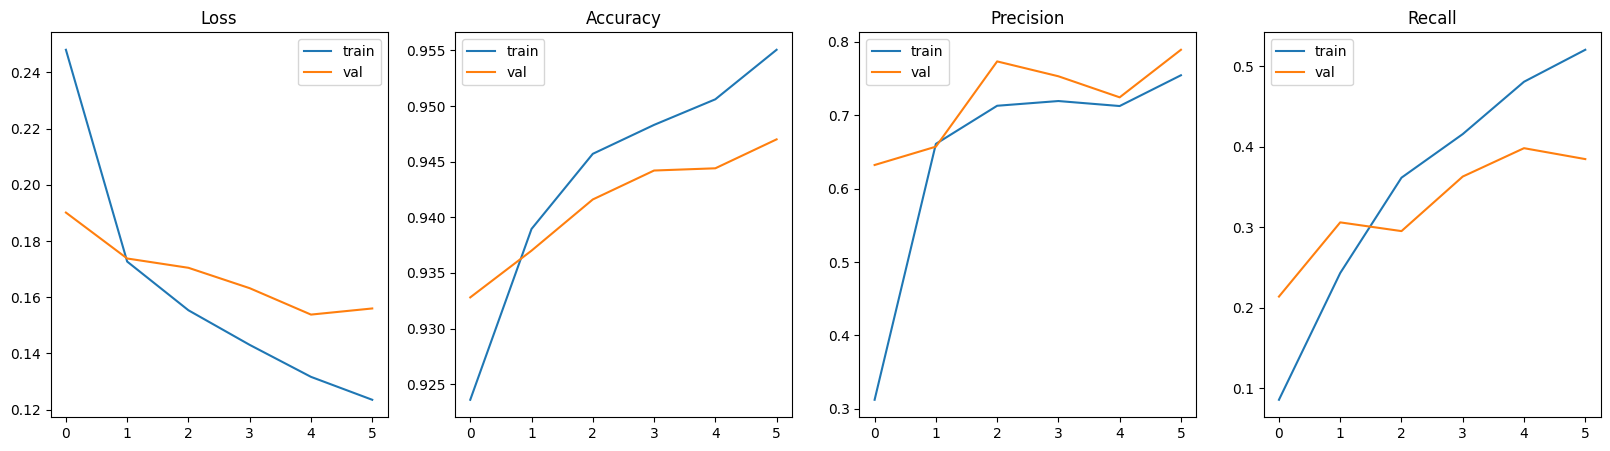

In [33]:
#Additionally the metrics produced per epoch when the model was training can be visualised to get a better idea for how the training went.
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].set_title('Loss')
axs[0].plot(history.history['loss'], label='train')
axs[0].plot(history.history['val_loss'], label='val')
axs[0].legend()

axs[1].set_title('Accuracy')
axs[1].plot(history.history['accuracy'], label='train')
axs[1].plot(history.history['val_accuracy'], label='val')
axs[1].legend()

axs[2].set_title('Precision')
axs[2].plot(history.history['precision'], label='train')
axs[2].plot(history.history['val_precision'], label='val')
axs[2].legend()

axs[3].set_title('Recall')
axs[3].plot(history.history['recall'], label='train')
axs[3].plot(history.history['val_recall'], label='val')
axs[3].legend()

In [34]:
predictions = model.predict(tf_val_data)
predictions = np.concatenate(predictions).round().astype(int)

val_data['predictions'] = predictions

1/1 [==============================] - 3s 3s/step


In [35]:
false_positives = val_data[(val_data['predictions'] == 1) & (val_data['target'] == 0)]

print('Count of false positives: ' + str(len(false_positives)))

Count of false positives: 38


In [36]:
false_positives.head(10)

,id,label,tweet,text,target,predictions
20192,20193,0.0,everyone hates the white crayon that looks so perfect while the others bleed and break,everyon hate white crayon look perfect other bleed break,0,1
20233,20234,0.0,@user @user #clusterfuck when will @user address systemic mass murder in arab states? @user,#clusterfuck address system mass murder arab states?,0,1
20265,20266,0.0,what a massive disappointment @user is. suppoing a racist mysogonist liar like @user unfollow and dislike.,massiv disappoint is. suppo racist mysogonist liar like unfollow dislike.,0,1
20345,20346,0.0,#tuesday! :) #rolling #stones - paint it black via @user,#tuesday! :) #roll #stone paint black via,0,1
20512,20513,0.0,"french#ultras are wankers and so are the russian, english hooligans. why do these fools always spoil the game?","french#ultra wanker russian, english hooligans. fool alway spoil game?",0,1
20556,20557,0.0,@user so which of his ideas do you like? muslim ban? the wall? harassing journalists? biher comments? mexicans as rapists?,idea like? muslim ban? wall? harass journalists? biher comments? mexican rapists?,0,1
20788,20789,0.0,the first black president has endorsed the first women democratic nominee candidate for the presidency. #milestone,first black presid endors first women democrat nomine candid presidency. #mileston,0,1
20858,20859,0.0,.@user @user voters like him not for his policies but because of his racism. #omg,. voter like polici racism. #omg,0,1
20904,20905,0.0,#foxnewssunday your panel of anti-trump pundits felt like an obviously pathetic attempt to sway undecided voters from suppoing trump,#foxnewssunday panel anti trump pundit felt like obvious pathet attempt sway undecid voter suppo trump,0,1
21236,21237,0.0,i believe in my hea @user will do more for african americans then obama has ever done which was nothing but welfare @user,believ hea african american obama ever done noth welfar,0,1


In [37]:
false_negatives = val_data[(val_data['predictions'] == 0) & (val_data['target'] == 1)]

print('Count of false negatives: ' + str(len(false_negatives)))

Count of false negatives: 227


In [38]:
false_positives.tail(10)

,id,label,tweet,text,target,predictions
23891,23892,0.0,"@user you were desperately smearing trump, shapeshifting cuck !","desper smear trump, shapeshift cuck !",0,1
23964,23965,0.0,churchill guide to public speaking trump would call churchill a loser. #charactermatters #neverump,churchil guid public speak trump would call churchil loser. #charactermatt #neverump,0,1
23968,23969,0.0,shocked by what's considered racist these days.,shock consid racist days.,0,1
23987,23988,0.0,"@user @user @user these leftist are so predictable, they are #pathetic &amp;","leftist predictable, #pathet &amp;",0,1
23988,23989,0.0,@user @user the #fbi #corrupt #doj are #hillaryclinton &amp; #obama #corrupt #lapdogs.,#fbi #corrupt #doj #hillaryclinton &amp; #obama #corrupt #lapdogs.,0,1
24215,24216,0.0,"@user what pa of ""no mayo, no oil"" was not clear? here they both are oozing out #gross #unhappytraveler","pa mayo, oil clear? ooz #gross #unhappytravel",0,1
24604,24605,0.0,@user @user you can't hate radical islamic terrorists now? america in 2016. .,can't hate radic islam terrorist now? america 2016. .,0,1
24851,24852,0.0,"@user @user so now roseanne is walking back her endorsement of a racist, whilst judging ppl by the # of their followers.","roseann walk back endors racist, whilst judg ppl # followers.",0,1
24927,24928,0.0,most tolerant nation in the world is india! we tolerated #corruption #rapes #justice #blackmagic #blindfaith #scammers #criminals,toler nation world india! toler #corrupt #rape #justic #blackmag #blindfaith #scammer #crimin,0,1
24979,24980,0.0,#not #dailysketch #e3 @ new york - george washington bridge,#not #dailysketch #e3 @ new york georg washington bridg,0,1


In [39]:
#Predictions
tf_test_data = tf.data.Dataset.from_tensor_slices((encoded_test_sentences))

def test_pipeline(tf_data, batch_size=1):        
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    tf_data = tf_data.padded_batch(batch_size, padded_shapes=([None]))
    
    return tf_data

tf_test_data = test_pipeline(tf_test_data)

predictions = model.predict(tf_test_data)

predictions = np.concatenate(predictions).round().astype(int)


6962/6962 [==============================] - 96s 14ms/step


In [40]:
#submission = pd.DataFrame(data={'target': predictions}, index=test_data['id'])
#submission.index = submission.index.rename('id')
#submission.to_csv('submission.csv')

### Word mismatch
### Earlier in the notebook I mentioned that the training, validation and test datasets are likely to contain words that the other datasets do not. If the model is only trained on the words in the training dataset there may be an overfitting problem when the model tries to read words it doesn't recognise in the validation and the test datasets.

In [42]:
def compare_words(train_words, test_words):
    unique_words = len(np.union1d(train_words, test_words))
    matching = len(np.intersect1d(train_words, test_words))
    not_in_train = len(np.setdiff1d(test_words, train_words))
    not_in_test = len(np.setdiff1d(train_words, test_words))
    
    print('Count of unique words in both arrays: ' + str(unique_words))
    print('Count of matching words: ' + str(matching))
    print('Count of words in first array but not in second: ' + str(not_in_test))
    print('Count of words in second array but not first: ' + str(not_in_train))

In [43]:
compare_words(encoded_sentences, val_encoded_sentences)

Count of unique words in both arrays: 35952
Count of matching words: 7185
Count of words in first array but not in second: 23918
Count of words in second array but not first: 4849


In [44]:
compare_words(encoded_sentences, encoded_test_sentences)

Count of unique words in both arrays: 37926
Count of matching words: 8296
Count of words in first array but not in second: 22807
Count of words in second array but not first: 6823


In [45]:
### Randomly initialised word embedding
### Before I started using the imported GloVe word embeddings I trained the model using a randomly initialised embedding. It performed quite well (though not as well as the GloVe embedding) so I thought I would keep the code down here.

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 200),
#     tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [46]:
#https://www.kaggle.com/code/mattbast/rnn-and-nlp-detect-a-disaster-in-tweets/notebook

In [3]:
#https://www.kaggle.com/code/kcsener/8-recurrent-neural-network-rnn-tutorial
#https://www.kaggle.com/code/prashant111/comprehensive-guide-to-rnn-with-keras
#https://www.kaggle.com/code/therealcyberlord/fake-news-detection-using-rnn/notebook

### use case 2

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

In [2]:
#Read the data
fake_df = pd.read_csv('C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/Fake.csv')
real_df = pd.read_csv('C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/True.csv')

In [3]:
#Checking for null values
fake_df.isnull().sum()
real_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [4]:
#Checking for unique values for subject. We want both data frames to have a similar distribution.
print("Fake:", fake_df.subject.unique())
print("Real:", real_df.subject.unique())

Fake: ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']
Real: ['politicsNews' 'worldnews']


In [5]:
#Dropping features
fake_df.drop(['date', 'subject'], axis=1, inplace=True)
real_df.drop(['date', 'subject'], axis=1, inplace=True)

In [6]:
#Target
fake_df['class'] = 0 
real_df['class'] = 1

Text(0, 0.5, 'Proportion of News Articles')

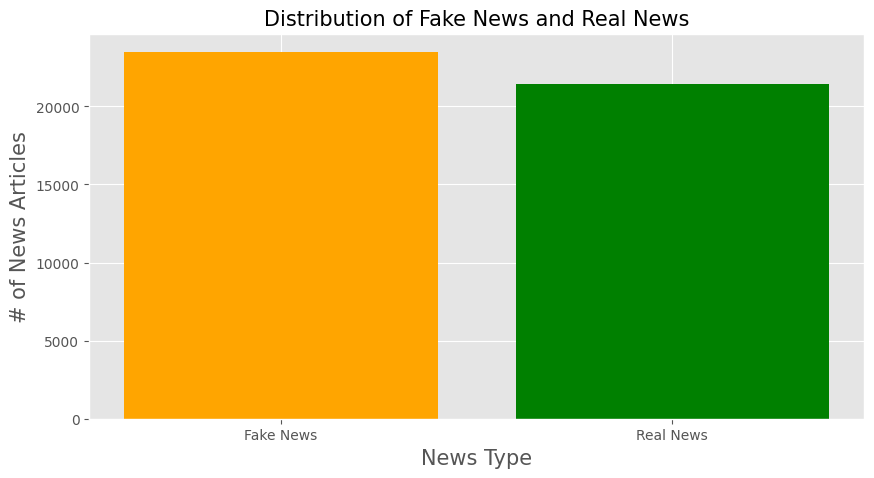

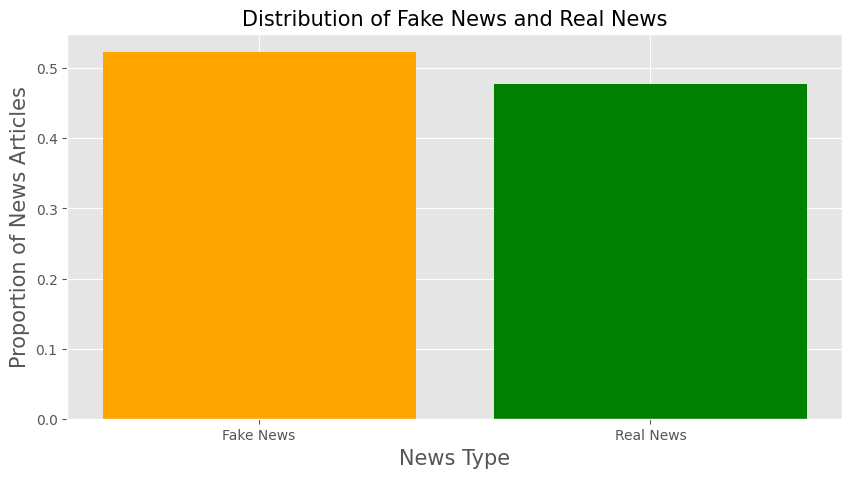

In [7]:
#Check out the distribution of fake news compare to real news

plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df), color='orange')
plt.bar('Real News', len(real_df), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)


total_len = len(fake_df) + len(real_df)
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df) / total_len, color='orange')
plt.bar('Real News', len(real_df) / total_len, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)

In [8]:
print('Difference in news articles:',len(fake_df)-len(real_df))

Difference in news articles: 2064


In [9]:
#Merge
news_df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)
news_df

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [10]:
#Combining the title with the text, it is much easier to process this way.
news_df['text'] = news_df['title'] + news_df['text']
news_df.drop('title', axis=1, inplace=True)

In [11]:
#Split into training and testing
features = news_df['text']
targets = news_df['class']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

In [12]:
#Normalizing our data: lower case, get rid of extra spaces, and url links.
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

In [13]:
#Text to Number conversion
#Convert text to vectors, our classifier only takes numerical data.

max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

# tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [14]:
#Apply padding so we have the same length for each article
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [15]:
#Building the RNN.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [16]:
#We are going to use early stop, which stops when the validation loss no longer improve.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/5
1078/1078 [==============================] - 725s 658ms/step - loss: 0.2425 - accuracy: 0.8778 - val_loss: 0.0642 - val_accuracy: 0.9805
Epoch 2/5
1078/1078 [==============================] - 615s 571ms/step - loss: 0.0434 - accuracy: 0.9890 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 3/5
1078/1078 [==============================] - 601s 558ms/step - loss: 0.0199 - accuracy: 0.9953 - val_loss: 0.0290 - val_accuracy: 0.9886
Epoch 4/5
1078/1078 [==============================] - 584s 541ms/step - loss: 0.0130 - accuracy: 0.9970 - val_loss: 0.0305 - val_accuracy: 0.9894
Epoch 5/5
1078/1078 [==============================] - 506s 470ms/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0213 - val_accuracy: 0.9947


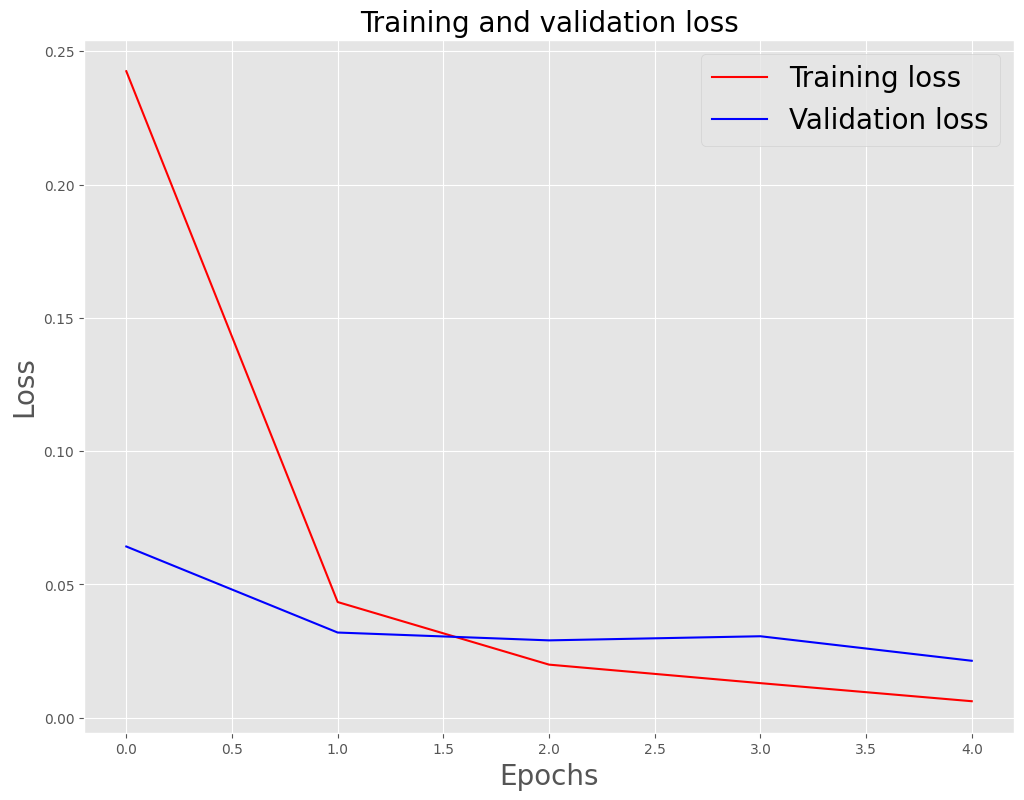

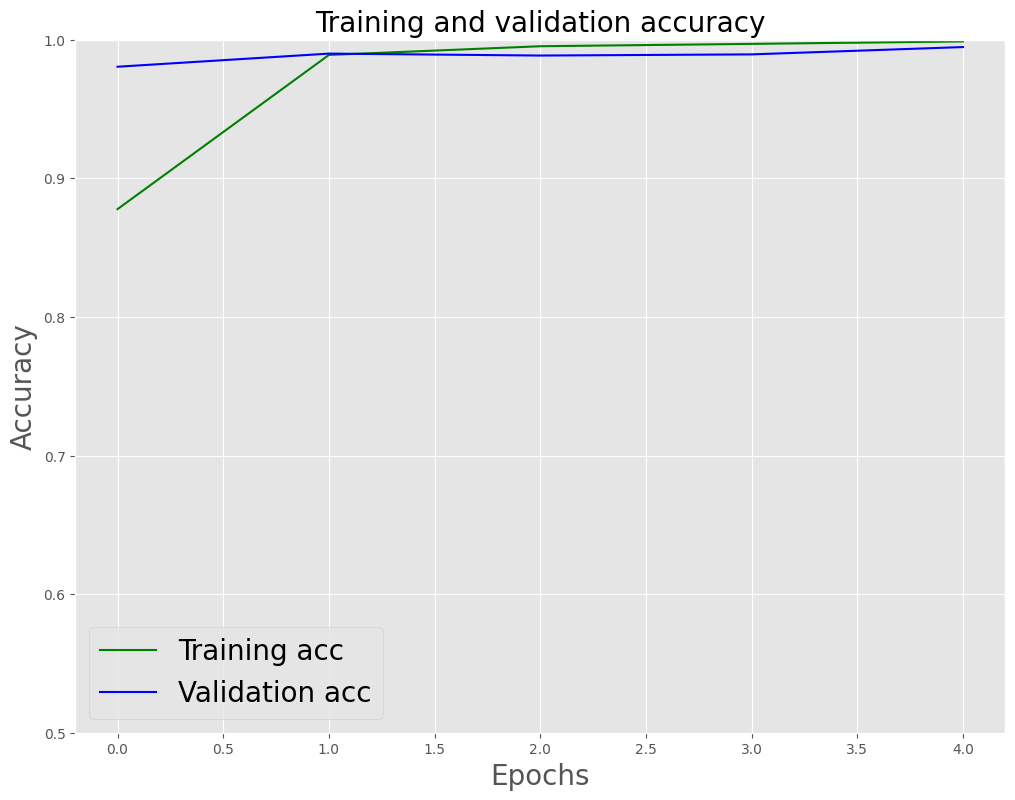

In [17]:
#Visualize our training over time
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()


In [18]:
#Evaluate the testing set
model.evaluate(X_test, y_test)

281/281 [==============================] - 34s 122ms/step - loss: 0.0315 - accuracy: 0.9921


[0.03154575452208519, 0.992093563079834]

In [19]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

281/281 [==============================] - 35s 116ms/step


In [20]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9920935412026726
Precision on testing set: 0.9905048633626679
Recall on testing set: 0.9930345948456002


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

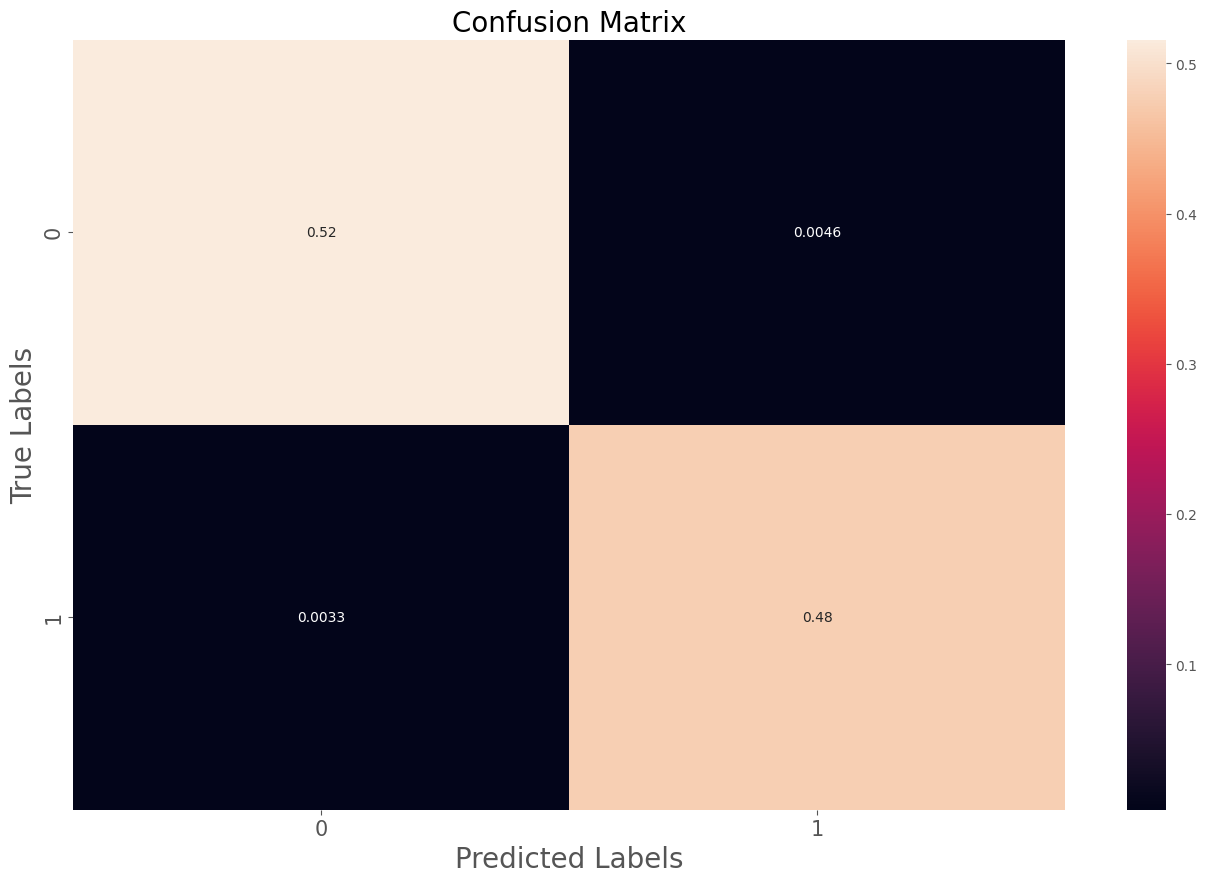

In [21]:
#Confusion matrix
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

In [22]:
#Saves the weights for visualiation
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 128)


In [23]:
word_index = list(tokenizer.word_index.keys())
word_index = word_index[:max_vocab-1]

In [24]:
#Write to file so we can use tensorflow's embedding projector to visualize what our network learned. This is only based on the fake news dataset.
import io

out_v = io.open('fakenews_vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('fakenews_meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(word_index):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

In [ ]:
#Embedding Projector: http://projector.tensorflow.org/
#Picture credits: https://www.tensorflow.org/tensorboard/images/embedding_projector.png?raw=1